In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
data=[[1,2],[3,4],[2.5,4],[1.5,2.5],[3,5],[2.8,4.5],[2.5,4.5],[1.2,2.5],[1,3],[1,5],[1,2.5],[5,6],[4,3]]
df=pd.DataFrame(data,columns=['X','Y'])

In [3]:
df.head()

,X,Y
0,1.0,2.0
1,3.0,4.0
2,2.5,4.0
3,1.5,2.5
4,3.0,5.0


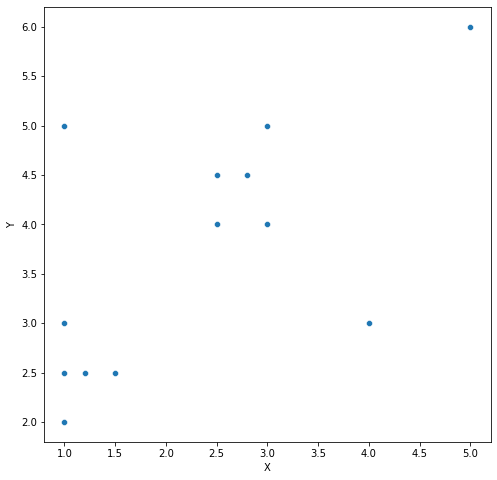

In [4]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='X',y='Y',data = df)
plt.show()

### finding neighbor 

In [5]:
def point_neighbor(data,epthlon):
    data=data.to_numpy()
    N=[]
    t_N=[]
    for x in data:
        N=[]
        for i in data:
            d=np.linalg.norm(x-i)
            if d<=epthlon:
                N.append(i)
        t_N.append(N)
    return t_N

### detect cluster , core point , border point ,noise point

In [6]:
def cluster(df,t_N,min_point):
    outlier=[]
    core=[]
    border=[]
    t=0
    noise_point=[]
    core_point=[]
    border_point=[]
    for i in t_N:
        if len(i)>= (min_point+1):
            core.append(i)
            core_point.append(list(df.iloc[t]))
            t=t+1
        elif len(i) == 1:
            outlier.append(i)
            noise_point.append(list(df.iloc[t]))
            t=t+1                  
        elif len(i) < (min_point+1):
            border.append(i)
            border_point.append(list(df.iloc[t]))
            t=t+1
    final_core=[]
    for i in core:
        x=[l.tolist() for l in i]
        final_core.append(x)
    final_core = list(num for num,_ in itertools.groupby(sorted(final_core)))
    final_border=[]
    for i in border:
        x=[l.tolist() for l in i]
        final_border.append(x)
    final_outlier=[]
    for i in outlier:
        x=[l.tolist() for l in i]
        final_outlier.append(x[0])
    final_core.append(final_outlier)
                            
    return final_core,border_point,noise_point,core_point            

### find common points between clusters

In [7]:
def common_point(cluster1,cluster2):
    for ele in cluster1:
        if ele in cluster2:
            cluster1.extend(cluster2)
            cluster1.sort()
            cluster1 = list(cluster1 for cluster1,_ in itertools.groupby(cluster1))
            return True, cluster1
    return False , 0
    

### merge clusters with common point

In [8]:
def denisty_connected(final_core):
    num_cluster=len(final_core)
    cluster=[]
    for i in range(num_cluster-1):
        for j in range(num_cluster-1):
            p, cluster1=common_point(final_core[i],final_core[j])
            if p==True:
                cluster.append(cluster1) 
    cluster.append(final_core[num_cluster-1])
    cluster = list(num for num,_ in itertools.groupby(sorted(cluster)))
    return cluster
                

### cluster label to data

In [9]:
def label_c(df,final_cluster):
    label=[]
    for i in range(len(df)):
        for j in final_cluster:
            if list(df.iloc[i]) in j:
                label.append(final_cluster.index(j))
    label=np.array(label)
    return label
    

### the main function

In [10]:
def dbscan(df,e,min_point):
    t_N=point_neighbor(df,e)
    final_core,border_point,noise_point,core_point=cluster(df,t_N,min_point)
    final_cluster=denisty_connected(final_core)
    label=label_c(df,final_cluster)
    return final_cluster,border_point,noise_point,core_point,label    

In [11]:
final_cluster,border_point,noise_point,core_point,label=dbscan(df,0.6,4)
print('final_cluster')
for i in final_cluster:
    print(i)
print('core_point')
print(core_point)
print('noise_point')
print(noise_point)
print('border_point')
print(border_point)
print('label')
print(label)

final_cluster
[[1.0, 2.0], [1.0, 2.5], [1.0, 3.0], [1.2, 2.5], [1.5, 2.5]]
[[1.0, 5.0], [5.0, 6.0], [4.0, 3.0]]
[[2.5, 4.0], [2.5, 4.5], [2.8, 4.5], [3.0, 4.0], [3.0, 5.0]]
core_point
[[2.8, 4.5], [1.2, 2.5], [1.0, 2.5]]
noise_point
[[1.0, 5.0], [5.0, 6.0], [4.0, 3.0]]
border_point
[[1.0, 2.0], [3.0, 4.0], [2.5, 4.0], [1.5, 2.5], [3.0, 5.0], [2.5, 4.5], [1.0, 3.0]]
label
[0 2 2 0 2 2 2 0 0 1 0 1 1]


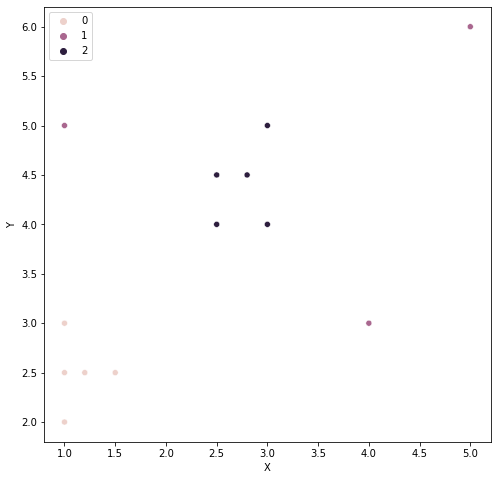

In [12]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='X',y='Y',data = df,hue=label)
plt.show()